# Chart Time-Series of the 2019 Novel Coronavirus

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Read-Google-Spreadsheet-as-a-DataFrame" data-toc-modified-id="1.-Read-Google-Spreadsheet-as-a-DataFrame-1">1. Read Google Spreadsheet as a DataFrame</a></span><ul class="toc-item"><li><span><a href="#Necessary-Imports" data-toc-modified-id="Necessary-Imports-1.1">Necessary Imports</a></span></li><li><span><a href="#Read-Google-Sheet-into-DataFrame" data-toc-modified-id="Read-Google-Sheet-into-DataFrame-1.2">Read Google Sheet into DataFrame</a></span><ul class="toc-item"><li><span><a href="#Global-Dataset" data-toc-modified-id="Global-Dataset-1.2.1">Global Dataset</a></span></li><li><span><a href="#U.S.-Dataset" data-toc-modified-id="U.S.-Dataset-1.2.2">U.S. Dataset</a></span></li></ul></li><li><span><a href="#Analysis" data-toc-modified-id="Analysis-1.3">Analysis</a></span><ul class="toc-item"><li><span><a href="#Confirmed-Cases" data-toc-modified-id="Confirmed-Cases-1.3.1">Confirmed Cases</a></span></li><li><span><a href="#Recovered-Cases" data-toc-modified-id="Recovered-Cases-1.3.2">Recovered Cases</a></span></li><li><span><a href="#Death-Cases" data-toc-modified-id="Death-Cases-1.3.3">Death Cases</a></span></li></ul></li></ul></li><li><span><a href="#2.-Parse-the-Time-Series-Data-(Mainland-China)" data-toc-modified-id="2.-Parse-the-Time-Series-Data-(Mainland-China)-2">2. Parse the Time-Series Data (Mainland China)</a></span><ul class="toc-item"><li><span><a href="#Time-Series-of-Confirmed-Cases-in-Mainland-China" data-toc-modified-id="Time-Series-of-Confirmed-Cases-in-Mainland-China-2.1">Time-Series of Confirmed Cases in Mainland China</a></span></li><li><span><a href="#The-Recovered,-and-Death-cases-in-Mainland-China" data-toc-modified-id="The-Recovered,-and-Death-cases-in-Mainland-China-2.2">The Recovered, and Death cases in Mainland China</a></span></li><li><span><a href="#Cross-Comparisons-within-different-categories" data-toc-modified-id="Cross-Comparisons-within-different-categories-2.3">Cross-Comparisons within different categories</a></span></li><li><span><a href="#Cross-comparisons-within-provinces" data-toc-modified-id="Cross-comparisons-within-provinces-2.4">Cross-comparisons within provinces</a></span></li><li><span><a href="#Splitting-and-stacking-cycles" data-toc-modified-id="Splitting-and-stacking-cycles-2.5">Splitting and stacking cycles</a></span></li></ul></li><li><span><a href="#3.-Parse-the-time-series-data-(in-the-U.-S.,-Australia-&amp;-Canada)" data-toc-modified-id="3.-Parse-the-time-series-data-(in-the-U.-S.,-Australia-&amp;-Canada)-3">3. Parse the time-series data (in the U. S., Australia &amp; Canada)</a></span><ul class="toc-item"><li><span><a href="#Confirmed-and-Recovered-cases-in-the-U.S." data-toc-modified-id="Confirmed-and-Recovered-cases-in-the-U.S.-3.1">Confirmed and Recovered cases in the U.S.</a></span></li><li><span><a href="#Confirmed-Case-in-Australia-&amp;-Canada" data-toc-modified-id="Confirmed-Case-in-Australia-&amp;-Canada-3.2">Confirmed Case in Australia &amp; Canada</a></span></li><li><span><a href="#Confirmed-Cases-on-the-Cruise-Ship" data-toc-modified-id="Confirmed-Cases-on-the-Cruise-Ship-3.3">Confirmed Cases on the Cruise Ship</a></span></li></ul></li><li><span><a href="#4.-Time-Series-Lag-Scatter-Plots" data-toc-modified-id="4.-Time-Series-Lag-Scatter-Plots-4">4. Time Series Lag Scatter Plots</a></span></li><li><span><a href="#5.-Time-Series-Autocorrelation-Plots" data-toc-modified-id="5.-Time-Series-Autocorrelation-Plots-5">5. Time Series Autocorrelation Plots</a></span></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-6">Conclusions</a></span></li><li><span><a href="#References" data-toc-modified-id="References-7">References</a></span></li></ul></div>

This notebook performs analysis and time series charting of 2019 novel coronavirus disease (COVID-19) globally:

## 1. Read Google Spreadsheet as a DataFrame

The Google Sheet to be used as reference is made and maintained by the **Johns Hopkins CSSE**, and their maps can be viewed <a href="https://gisanddata.maps.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6">here</a>. If you are having an issue accessing the Google Sheet, please try downloading the data source provided on their <a href="https://github.com/CSSEGISandData/2019-nCoV">GitHub repo</a>.

The csv file has three types of cases - `Cofirmed`, `Recovered` and `Deaths` - spotted inside and outside Mainland China, across the time span from 1/21/2020 to Current.

### Necessary Imports

In [1]:
from io import BytesIO
import requests
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

### Read Google Sheet into DataFrame

#### Global Dataset

First, read the three tabs on Google Sheet - namely 'confirmed', 'death', 'recovered' - into three individual DataFrames, and append them one after another into an empty list.

In [3]:
cases = ['confirmed', 'deaths', 'recovered']
sheet = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_'
suffix = '_global.csv'
df_list = []

for i in range(len(cases)):
    ts_url = sheet + cases[i] + suffix
    df = pd.read_csv(ts_url, header=0, escapechar='\\')
    display(df.head(3))
    df_list.append(df)
    exec("{0}=df".format(cases[i]))

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1703,1828,1939,2171,2335,2469,2704,2894,3224,3392
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,736,750,766,773,782,789,795,803,820,832
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,3517,3649,3848,4006,4154,4295,4474,4648,4838,4997


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,57,58,60,64,68,72,85,90,95,104
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,28,30,30,31,31,31,31,31,31,31
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,432,437,444,450,453,459,463,465,470,476


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,220,228,252,260,310,331,345,397,421,458
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,422,431,455,470,488,519,531,543,570,595
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,1558,1651,1702,1779,1821,1872,1936,1998,2067,2197


In [4]:
# shape of matrices for confirmed, death, and recovered
df_list[0].shape, df_list[1].shape, df_list[2].shape

((266, 110), (266, 110), (252, 110))

#### U.S. Dataset

In [9]:
cases = ['confirmed', 'deaths']
sheet = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_'
suffix = '_US.csv'
us_df_list = []

for i in range(len(cases)):
    us_ts_url = sheet + cases[i] + suffix
    df = pd.read_csv(us_ts_url, header=0, escapechar='\\')
    display(df.head(3))
    us_df_list.append(df)
    exec("{0}=df".format(cases[i]))

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,141,141,141,145,145,145,145,145,145,149
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,14,14,14,14,14,14,14,14,14,15


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,5,5,5,5,5,5,5,5,5,5
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,2,2,2,2,2,2,2,2,2,2


In [10]:
# shape of matrices for confirmed, death, and recovered
us_df_list[0].shape, us_df_list[1].shape

((3261, 117), (3261, 118))

### Analysis

Now, let's proceed to these three categories ('confirmed', 'death', 'recovered') individually.

#### Confirmed Cases

As shown below, of the 266 rows of records in the first DataFrame being converted and parsed from Google Sheet, 33 rows are for cases reported for each province in Mainland China (as of May 7th, 2020).

In [7]:
df_confirmed = df_list[0]
print(df_confirmed[df_confirmed['Country/Region'] == 'China'].shape)
df_confirmed[df_confirmed['Country/Region'] == 'China'].head()

(33, 110)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20
49,Anhui,China,31.8257,117.2264,1,9,15,39,60,70,...,991,991,991,991,991,991,991,991,991,991
50,Beijing,China,40.1824,116.4142,14,22,36,41,68,80,...,593,593,593,593,593,593,593,593,593,593
51,Chongqing,China,30.0572,107.8740,6,9,27,57,75,110,...,579,579,579,579,579,579,579,579,579,579
52,Fujian,China,26.0789,117.9874,1,5,10,18,35,59,...,355,355,355,356,356,356,356,356,356,356
53,Gansu,China,37.8099,101.0583,0,2,2,4,7,14,...,139,139,139,139,139,139,139,139,139,139


In [8]:
print(df_confirmed[df_confirmed['Country/Region'] == 'US'].shape)
df_confirmed[df_confirmed['Country/Region'] == 'US'].head()

(1, 110)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20
225,NaN,US,37.0902,-95.7129,1,1,2,2,5,5,...,988197,1012582,1039909,1069424,1103461,1132539,1158040,1180375,1204351,1228603


#### Recovered Cases

Same here, for the purpose of comparison, we would need to get the figures of the other two categories - `recovered` and `deaths` besides `confirmed` cases.

In [11]:
df_recovered = df_list[1]
df_recovered.tail(3)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,0,0,0,2,2,2,2,2,4,5
264,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
265,NaN,Tajikistan,38.861034,71.276093,0,0,0,0,0,0,...,0,0,0,0,0,2,2,3,5,8


#### Death Cases

In [12]:
df_death = df_list[2]
df_death.tail(3)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20
249,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
250,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
251,NaN,Tajikistan,38.861034,71.276093,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


As we can tell from the snapshots of these dataframes, cases are reported in four geographic administrative units： 1. for Mainland China, number of cases are reported per province; 2. for most of the regions and countries outside of Mainland China, number of cases are summarized per region/country (e.g. we are seeing Belgium as a country/region being reported here); 3. for cities/counties with significant number of cases outside of Mainland China, number of cases are reported per single city or county (e.g. Madison, WI in the U.S. is listed individually here); 4. the last record in the DataFrame lists `Cruise Ship` since the Diamond Princess cruise ship itself contains a considerable amount of confirmed cases.

## 2. Parse the Time-Series Data (Mainland China)

Now we have obtained DataFrame for each type of coronavirus cases across the globe. We will apply a filter on each of the DataFrames, and analyze the Confirmed, Recovered, and Death cases separately, to see how the time-series evolved inside Mainland China.

### Time-Series of Confirmed Cases in Mainland China

First, a list called `provinces_list` needs to be extracted from the selected rows, and then be concatenated with the category (e.g. `_Confirmed`), in order to differentiate from the other two categories (e.g. `_Recovered` and `_Deaths`).

In [13]:
provinces_list = df_confirmed[df_confirmed['Country/Region'] == 'China'].iloc[:,0:1].T.values.tolist()[0]

In [14]:
map_output = map(lambda x: x + '_Confirmed', provinces_list)
list_map_output = list(map_output)

Next, let's remove the first five rows from the DataFrame `df` (which are the row#, Province/State, Country/Region, Unnamed:2, and Unnamed:3 columns, and are not needed for time-series charting), specify the index to the matrix, and perform a `Transpose` to have the `date_time` index shown as row indices.

In [24]:
df0 = df_confirmed[df_confirmed['Country/Region'] == 'China'].iloc[:,5:].fillna(0)
df0.index = pd.Index(list_map_output, name='date_time')
df0 = df0.T
df0.tail(3)

date_time,Anhui_Confirmed,Beijing_Confirmed,Chongqing_Confirmed,Fujian_Confirmed,Gansu_Confirmed,Guangdong_Confirmed,Guangxi_Confirmed,Guizhou_Confirmed,Hainan_Confirmed,Hebei_Confirmed,...,Shaanxi_Confirmed,Shandong_Confirmed,Shanghai_Confirmed,Shanxi_Confirmed,Sichuan_Confirmed,Tianjin_Confirmed,Tibet_Confirmed,Xinjiang_Confirmed,Yunnan_Confirmed,Zhejiang_Confirmed
5/4/20,991,593,579,356,139,1588,254,147,168,328,...,306,788,656,198,561,190,1,76,185,1268
5/5/20,991,593,579,356,139,1588,254,147,168,328,...,308,788,656,198,561,190,1,76,185,1268
5/6/20,991,593,579,356,139,1589,254,147,168,328,...,308,788,657,198,561,190,1,76,185,1268


Also, we would need to standardize the date_time string (esp. that the year should be represented as XXXX instead of XX), and then to convert it from a string type to a datetime type:

In [25]:
df0.index

Index(['1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20',
       '1/29/20', '1/30/20', '1/31/20', '2/1/20',
       ...
       '4/27/20', '4/28/20', '4/29/20', '4/30/20', '5/1/20', '5/2/20',
       '5/3/20', '5/4/20', '5/5/20', '5/6/20'],
      dtype='object', length=105)

In [26]:
df0.index = df0.index.str.replace('/20', '/2020')

In [27]:
df0.index = df0.index.str.replace('2020/2020', '20/2020')

In [28]:
df0.index = pd.to_datetime(df0.index, format='%m/%d/%Y', exact = False)

If the datetime conversion is successful, use the following cell to validate and check how many rows of datetime records are in the dataframe.

In [29]:
print("Dataframe shape: ", df0.shape)
time_diff = (df0.index[-1] - df0.index[0])
print("Number of hours between start and end dates: ", time_diff.total_seconds()/3600 + 1)

Dataframe shape:  (105, 33)
Number of hours between start and end dates:  2497.0


The following will achieve three different plots:
1. Plotting all the time series on one axis (line-plot)
2. Plotting them all on separate subplots to see them more clearly (sharing the x axis)
3. Plotting all the time series on one axis (scatterplot)

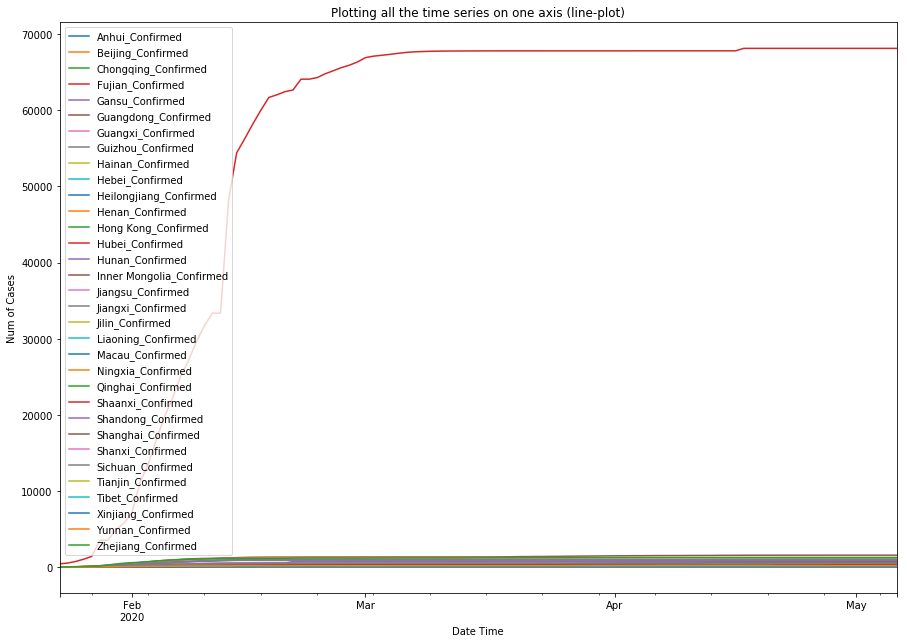

In [30]:
df0.plot(figsize=(15,10.5), title='Plotting all the time series on one axis (line-plot)').legend(loc='upper left')
plt.axis(aspect='equal'); plt.xlabel('Date Time'); text = plt.ylabel('Num of Cases')

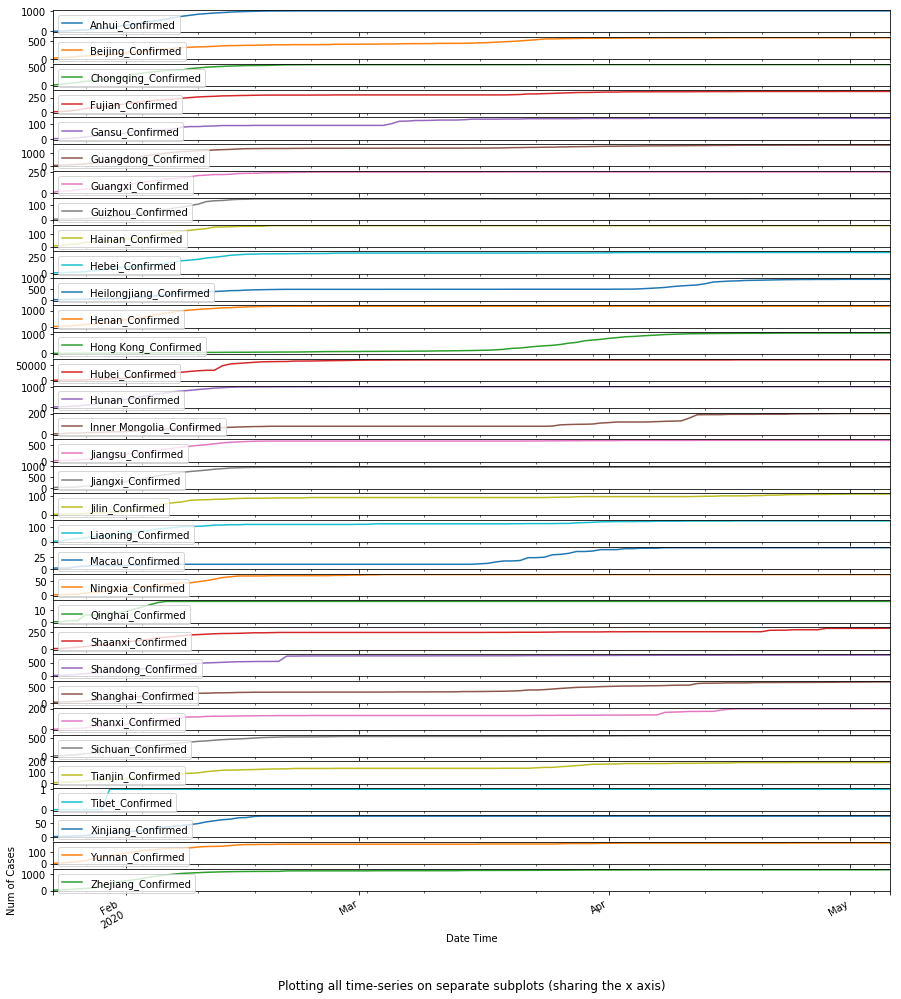

In [31]:
ax_array = df0.plot(subplots=True, figsize=(15,18))
for ax in ax_array:
    ax.legend(loc='upper left')
plt.axis(aspect='equal'); plt.xlabel('Date Time'); plt.ylabel('Num of Cases')
text = plt.title('Plotting all time-series on separate subplots (sharing the x axis)', pad="-120")

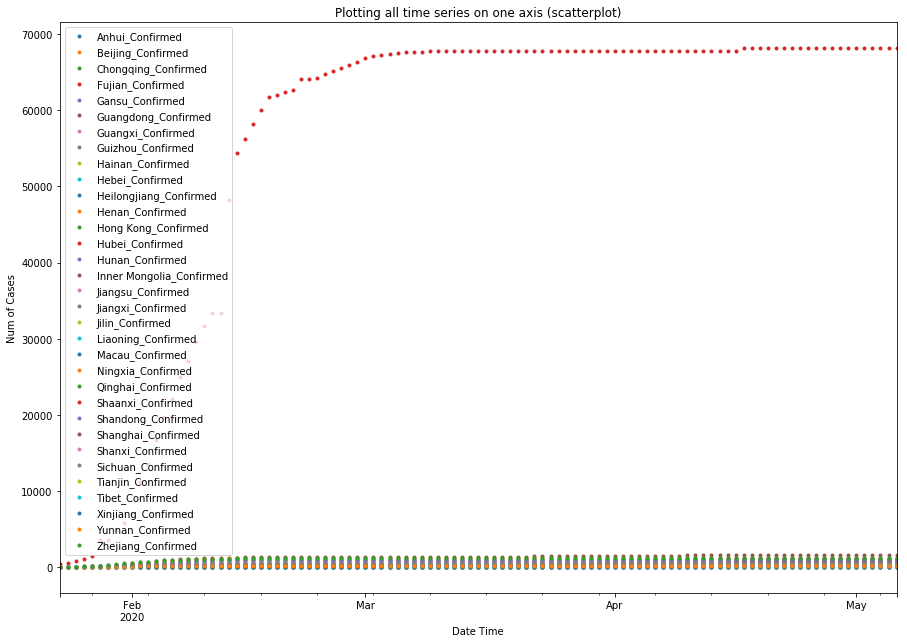

In [32]:
df0.plot(y=list_map_output, style='.', figsize=(15,10.5),
         title="Plotting all time series on one axis (scatterplot)").legend(loc='upper left')
plt.axis(aspect='equal'); plt.xlabel('Date Time'); text = plt.ylabel('Num of Cases')

From the three plots shown above, we can tell that Hubei province has the largest number of confirmed COVID-19 cases, preceded by Guangdong and Zhejiang provinces.

### The Recovered, and Death cases in Mainland China

Now the confirmed COVID-19 cases for each province in mainland China are shown as above, we are to define a function `plot_per_country` that is to help us plot other countries/regions, not only for the confirmed cases, but also other cases (Recovered or Deaths).

In [38]:
def plot_per_country(df, country_name, category = "Confirmed", ref_df = df0):
    provinces_list = df[df['Country/Region'] == country_name].iloc[:,0:1].T.values.tolist()[0]

    map_output = map(lambda x: x + '_' + category, provinces_list)
    list_map_output = list(map_output)

    df0 = df[df['Country/Region'] == country_name].iloc[:,5:].fillna(0)
    df0.index = pd.Index(list_map_output, name='date_time')
    df0 = df0.loc[:, ~df0.columns.str.contains('^Unnamed')]
    df0 = df0.T
    df0.index = df0.index.str.replace('/20', '/2020')
    df0.index = df0.index.str.replace('2020/2020', '20/2020')
    df0.index = pd.to_datetime(df0.index, format='%m/%d/%Y', exact = False)

    width_multiplier = df0.shape[1]/5

    df0.plot(figsize=(15,2*width_multiplier), 
             title='Plotting all the time series on one axis (line-plot)').legend(loc='upper left')
    plt.axis(aspect='equal'); plt.xlabel('Date Time'); plt.ylabel('Num of Cases')
    
    ax_array = df0.plot(subplots=True, figsize=(15,3*width_multiplier))
    for ax in ax_array:
        ax.legend(loc='upper left')
    plt.axis(aspect='equal'); plt.xlabel('Date Time'); plt.ylabel('Num of Cases')
    text = plt.title('Plotting all time-series on separate subplots (sharing the x axis)', pad="-120")
    
    df0.plot(y=list_map_output, style='.', figsize=(15,2*width_multiplier),
         title="Plotting all time series on one axis (scatterplot)").legend(loc='upper left')
    plt.axis(aspect='equal'); plt.xlabel('Date Time'); plt.ylabel('Num of Cases')
    
    return df0

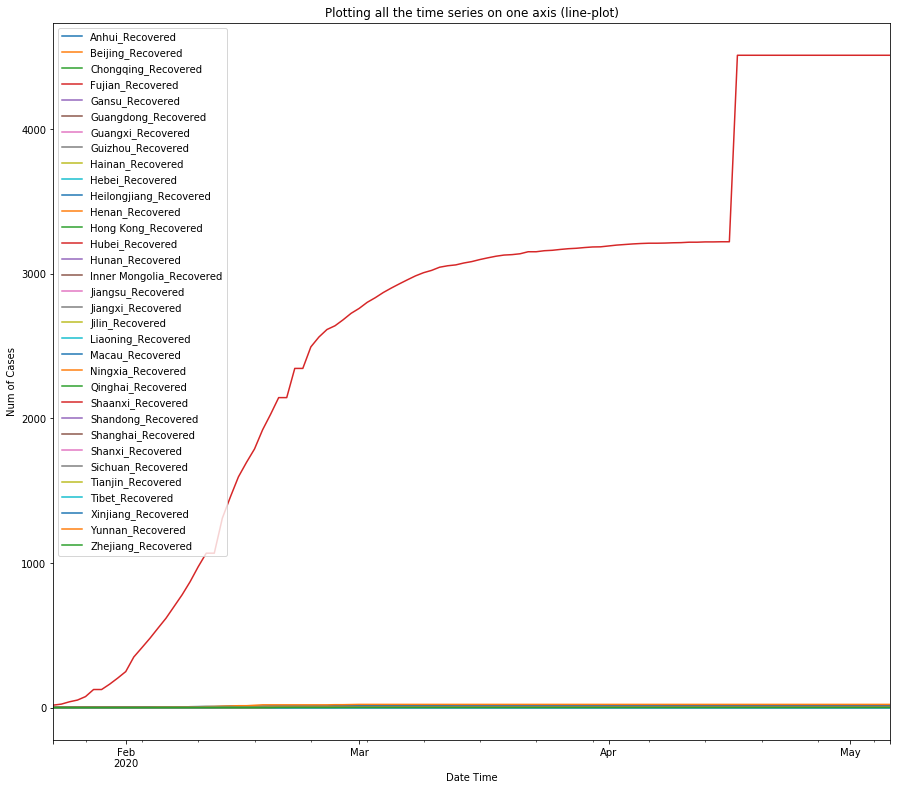

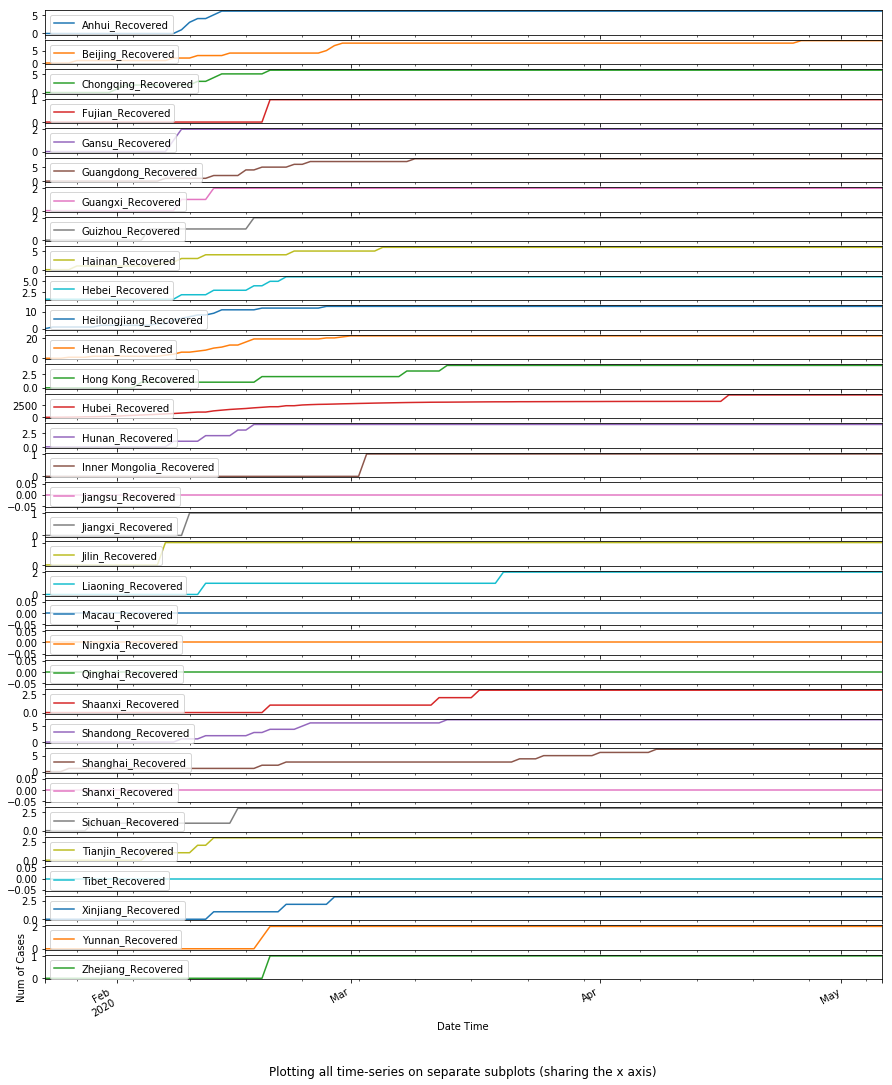

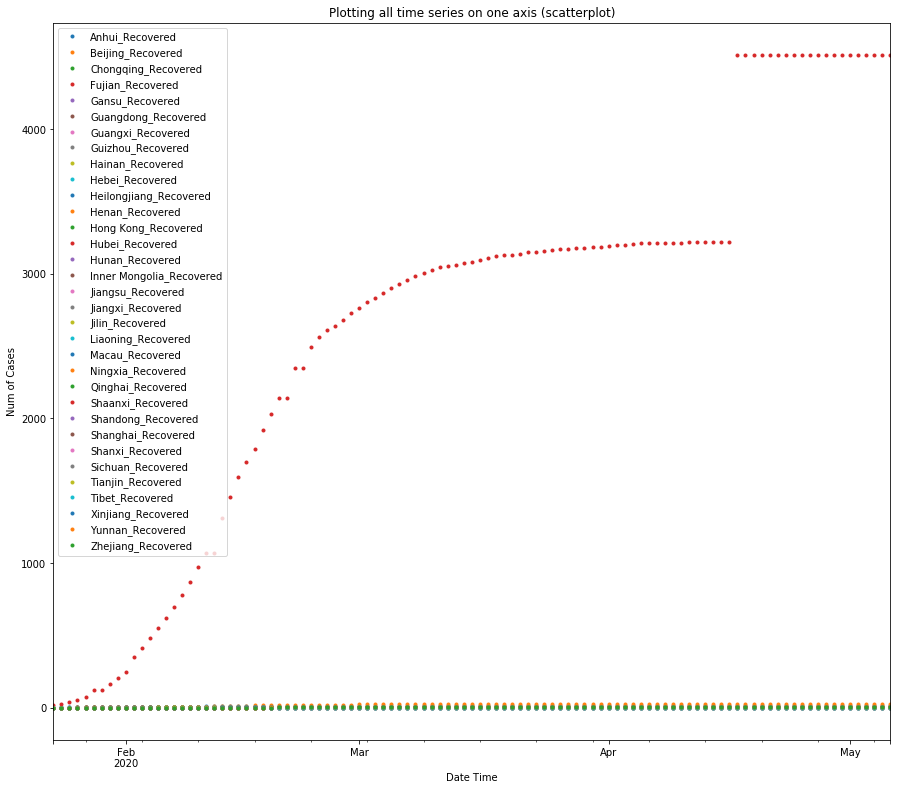

In [39]:
df_recovered_china = plot_per_country(df_recovered, "China", "Recovered")

The three plots shown above indicate that Hubei province also has the largest number of recovered cases from 2019-nCoV, preceded by Zhejiang and Hunan provinces.

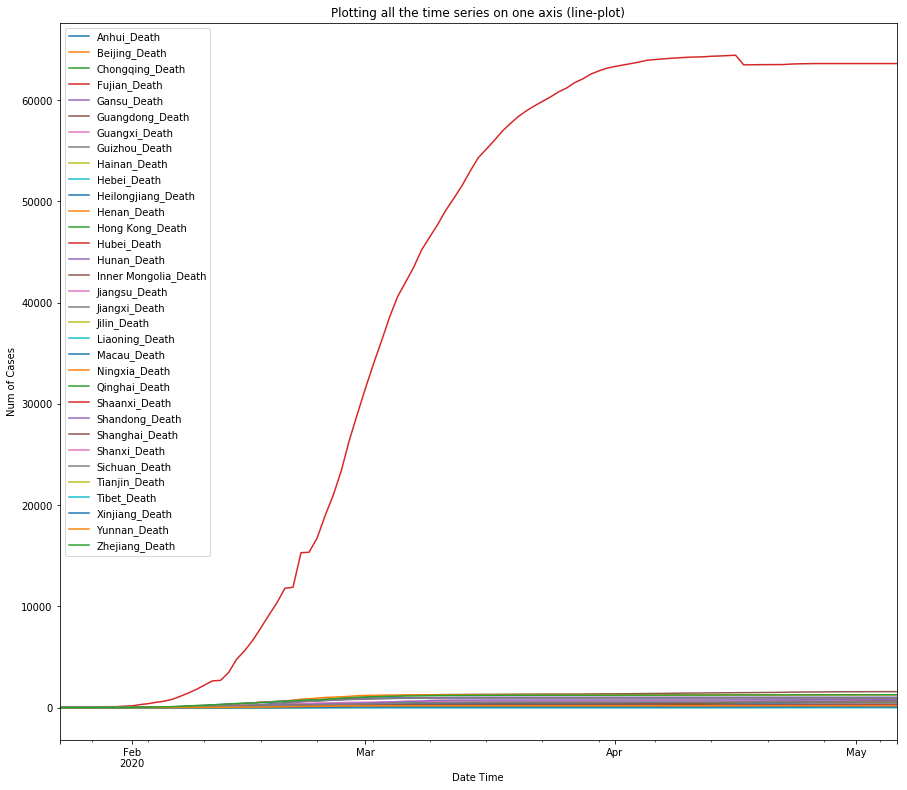

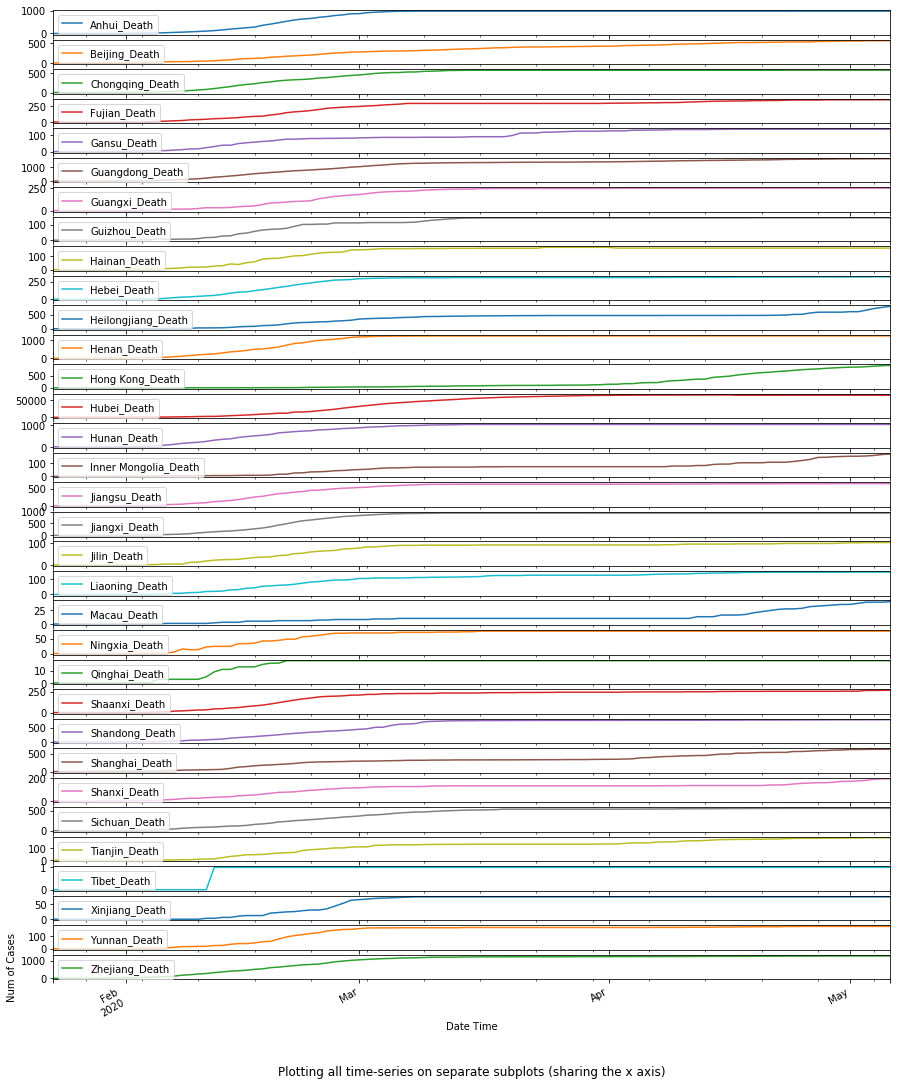

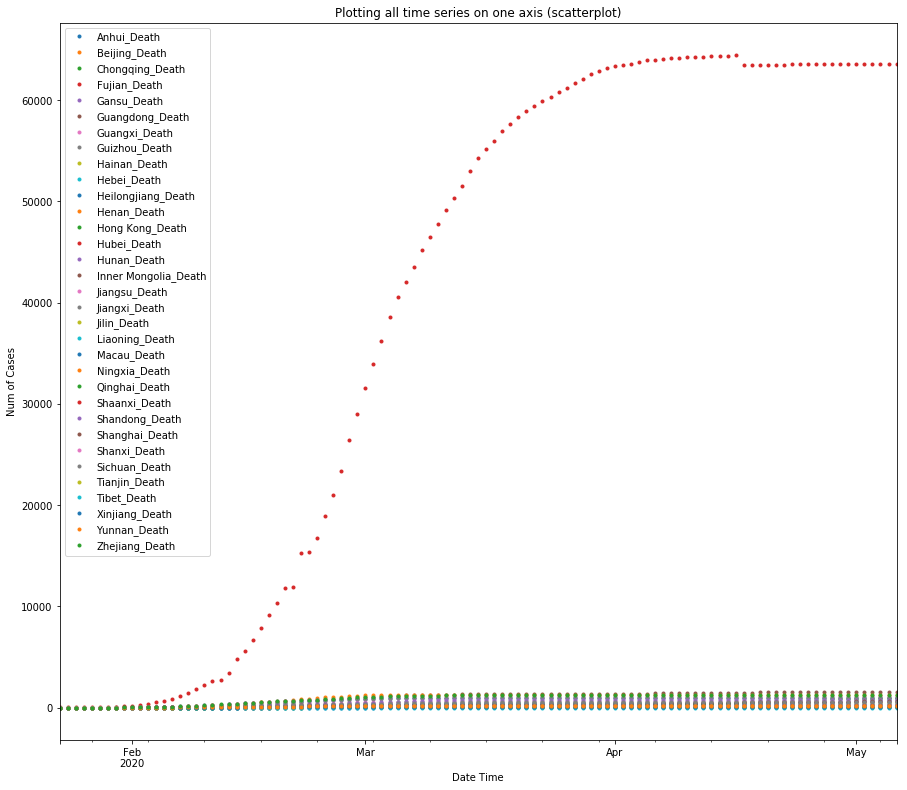

In [40]:
df_death_china = plot_per_country(df_death, "China", "Death")

Unfortunately, among all provinces of Mainland China, Hubei again has the largest number of deaths caused by COVID-19, followed by the Heilongjiang and Henan provinces.

### Cross-Comparisons within different categories

Now we have seen the confirmed, recovered, and death cases caused by COVID-19 for each province in mainland China, let's perform a cross comparison within these three categories by viewing the three time-series in a single plot per single province.

First, make sure these three DataFrames are of the same length (in time-series).

In [41]:
df0.shape, df_recovered_china.shape, df_death_china.shape

((105, 33), (105, 33), (105, 33))

In [42]:
def cross_compare_per_province(province="Hubei"):
    """ Used to plot the time-series of the confirmed, recovered and death 
    cases per province;
        Input: string for province name
        Output: provides three plots of the cross comparison per province
    """
    key0 = province + '_Confirmed'
    key1 = province + '_Recovered'
    key2 = province + '_Death'
    
    df_l = df0.loc[~df0.index.duplicated(keep='first')]
    df_m = df_recovered_china.loc[~df_recovered_china.index.duplicated(keep='first')]
    df_r = df_death_china.loc[~df_death_china.index.duplicated(keep='first')]
    
    df_all_china = pd.concat([df_l[key0], df_m[key1], df_r[key2]], axis=1)
    df_all_china.plot(figsize=(15,2))
    plt.axis(aspect='equal'); plt.xlabel('Date Time'); plt.ylabel('Num of Cases')
    
    df_all_china.plot(subplots=True, figsize=(15,3))
    plt.axis(aspect='equal'); plt.xlabel('Date Time'); plt.ylabel('Num of Cases')
    
    df_all_china.plot(y=[key0, key1, key2], style='.', figsize=(15,2))
    plt.axis(aspect='equal'); plt.xlabel('Date Time'); plt.ylabel('Num of Cases')
    
    return df_all_china

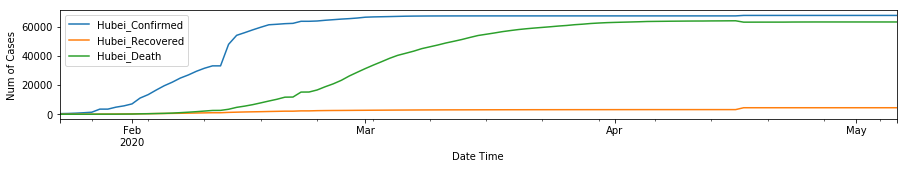

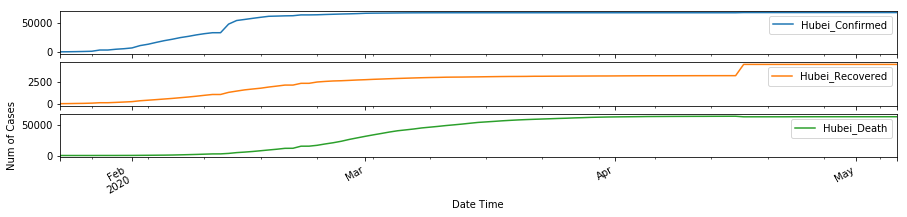

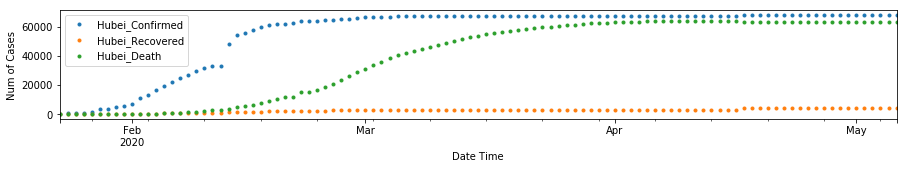

In [43]:
df_hubei = cross_compare_per_province()

In order to help understand the development trend of COVID-19, we need to obtain the `Recovered_Rate` and `Death_Rate` per state/province/region/country, and decide when is the turning point for Recovered_Rate to have surpassed Death_Rate.
```
Recovered_Rate = (# of Recovered Cases)/(# of Confirmed Cases)
Death_Rate = (# of Death Cases)/(# of Confirmed Cases)
```
Function `calc_rate_per_province` is defined to plot the trends of these two rates:

In [44]:
def calc_rate_per_province(province="Hubei"):
    """ Used to plot the time-series of the recovered and death 
    rates per province;
        Input: string for province name
        Output: provides three plots of the cross comparison per province
    """
    key0 = province + '_Confirmed'
    key1 = province + '_Recovered'
    key2 = province + '_Death'
    
    df_l = df0.loc[~df0.index.duplicated(keep='first')]
    df_m = df_recovered_china.loc[~df_recovered_china.index.duplicated(keep='first')]
    df_r = df_death_china.loc[~df_death_china.index.duplicated(keep='first')]

    df_all_china = pd.concat([(df_m[key1]*1.0).div((df_l[key0]*1.0), axis='index'),
                              (df_r[key2]*1.0).div((df_l[key0]*1.0), axis='index')],
                             keys=[key1 + '_Rate', key2 + '_Rate'],
                             axis=1)
    
    df_all_china.plot(figsize=(15,2))
    plt.axis(aspect='equal'); plt.xlabel('Date Time'); plt.ylabel('% of Confirmed Cases')
    
    df_all_china.plot(subplots=True, figsize=(15,3))
    plt.axis(aspect='equal'); plt.xlabel('Date Time'); plt.ylabel('% of Confirmed Cases')
    
    df_all_china.plot(style='.', figsize=(15,2))   
    plt.axis(aspect='equal'); plt.xlabel('Date Time'); plt.ylabel('% of Confirmed Cases')

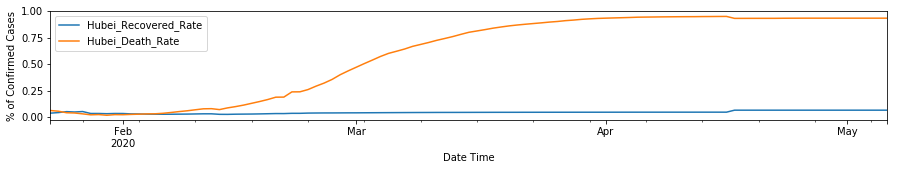

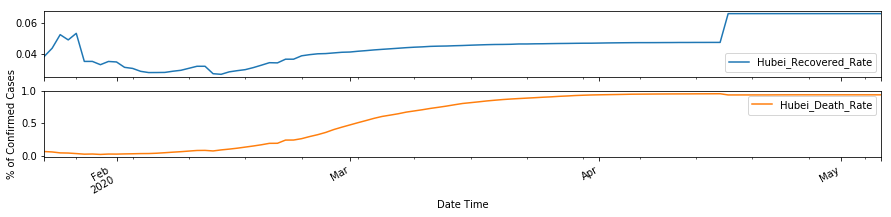

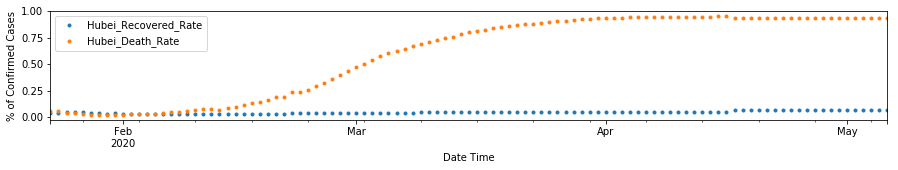

In [45]:
calc_rate_per_province()

We can tell from the plots above, the Recovered Rate has since surpassed the Death Rate for Hubei Province after 02/05/2020.

### Cross-comparisons within provinces

After looking at the different categories per province, let us now view the various provinces in one chart to see the variance from a different dimension. To start with, we pick the three provinces in China with largest numbers of confirmed COVID-19 cases.

In [46]:
df1 = df_confirmed[df_confirmed['Province/State'].isin(['Hubei', 'Guangdong', 'Zhejiang'])].iloc[:,5:].fillna(0)
df1

,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,...,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20
54,32,53,78,111,151,207,277,354,436,535,...,1587,1588,1588,1588,1588,1588,1588,1588,1588,1589
62,444,549,761,1058,1423,3554,3554,4903,5806,7153,...,68128,68128,68128,68128,68128,68128,68128,68128,68128,68128
81,27,43,62,104,128,173,296,428,538,599,...,1268,1268,1268,1268,1268,1268,1268,1268,1268,1268


In [47]:
df1.index = pd.Index(['Guangdong_Confirmed', 'Hubei_Confirmed', 'Zhejiang_Confirmed'],name='date_time')
df1 = df1.T
df1.index = df1.index.str.replace('/20', '/2020')
df1.index = df1.index.str.replace('2020/2020', '20/2020')
df1.index = pd.to_datetime(df1.index, format='%m/%d/%Y', exact = False)
df1

date_time,Guangdong_Confirmed,Hubei_Confirmed,Zhejiang_Confirmed
2020-01-23,32,444,27
2020-01-24,53,549,43
2020-01-25,78,761,62
2020-01-26,111,1058,104
2020-01-27,151,1423,128
...,...,...,...
2020-05-02,1588,68128,1268
2020-05-03,1588,68128,1268
2020-05-04,1588,68128,1268
2020-05-05,1588,68128,1268


In [48]:
print("Dataframe shape: ", df1.shape)
time_diff = (df1.index[-1] - df1.index[0])
print("Number of hours between start and end dates: ", time_diff.total_seconds()/3600 + 1)

Dataframe shape:  (105, 3)
Number of hours between start and end dates:  2497.0


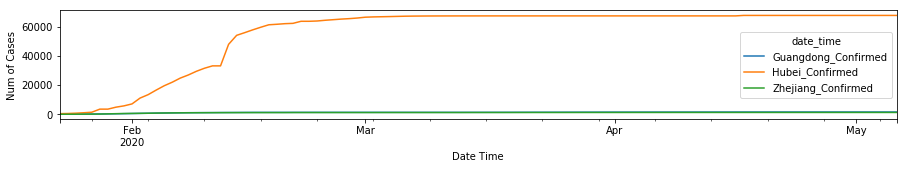

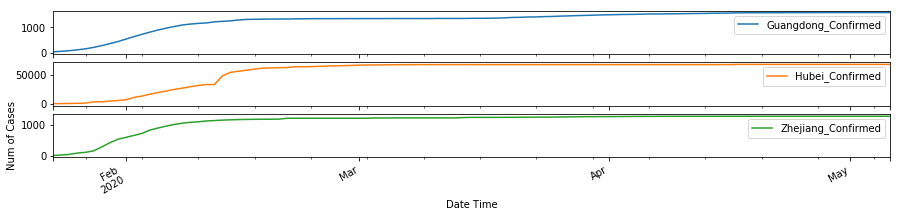

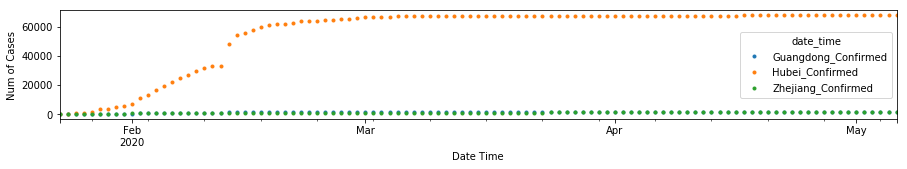

In [49]:
df1.plot(figsize=(15,2))
plt.axis(aspect='equal'); plt.xlabel('Date Time'); text=plt.ylabel('Num of Cases')
    
df1.plot(subplots=True, figsize=(15,3))
plt.axis(aspect='equal'); plt.xlabel('Date Time'); text=plt.ylabel('Num of Cases')

df1.plot(y=['Guangdong_Confirmed', 'Hubei_Confirmed', 'Zhejiang_Confirmed'], style='.', figsize=(15,2))
plt.axis(aspect='equal'); plt.xlabel('Date Time'); text=plt.ylabel('Num of Cases')

### Splitting and stacking cycles

Let’s split the time series up into its constituent cycles and stack them together. This requires some more complex work with `pandas` and `matplotlib`. At this point we will also downsample to a daily rate, which makes the plot a bit clearer and quicker to generate.

In [50]:
minima = ["2020-01-23", "2020-01-25", "2020-01-27", "2020-01-29", "2020-01-31", "2020-02-01",
          "2020-02-03", "2020-02-05", "2020-02-07", "2020-02-09", "2020-02-10", "2020-02-11",
          "2020-02-12", "2020-02-13", "2020-02-14", "2020-02-15"]

def split_into_cycles(province = 'Hubei', df2 = df_hubei):
    """Returns a list of dataframes, one for each cycle"""
    if df2 is None:
        key0 = province + '_Confirmed'
        key1 = province + '_Recovered'
        key2 = province + '_Death'
        df0.reset_index(drop= True)
        df_recovered_china.reset_index(drop= True)
        df_death_china.reset_index(drop= True)
        df2 = pd.concat([df0[key0],
                         df_recovered_china[key1],
                         df_death_china[key2]],
                        axis=1, ignore_index=True)
    else:
        print("Use existing DataFrame")
    df2.index = pd.to_datetime(df2.index, format='%m/%d/%Y %H:%M', exact = False)
    df_daily = df2.resample("1D").mean()
    
    cycles = []
    # Split by solar cycle
    for start, end in zip(minima[0:-1], minima[1:]):
        cycle = df2[start:end]
        # Convert from dates to days from minimum
        cycle.index = (cycle.index - cycle.index[0]).days
        # Extend so that each cycle lasts a full 100 days (filled with nan)
        cycle = cycle[~cycle.index.duplicated()]
        
        import numpy as np
        ix = pd.Int64Index(np.arange(0,100))
        cycle.reindex(ix)
        cycles.append(cycle)
    return cycles

cycles = split_into_cycles('Hubei', df_hubei)

Use existing DataFrame


We now have a list, `cycles`, containing 9 dataframes, each containing a different cycle. On each dataframe, we have changed the index into the number of days from the minimum, and used `.reindex()` to fix them all to the same length so that we can perform arithmetic operations on them together. The following will create a plot of each parameter, with the cycles superposed over each other. 

In this example, we first create the figure and its axes using `matplotlib` directly (using `sharex=True` to link the x-axes on each plot), then direct the `pandas` plotting commands to point them to the axis we want each thing to plot onto using the ax kwarg. We also calculate the mean of the stacked time series.

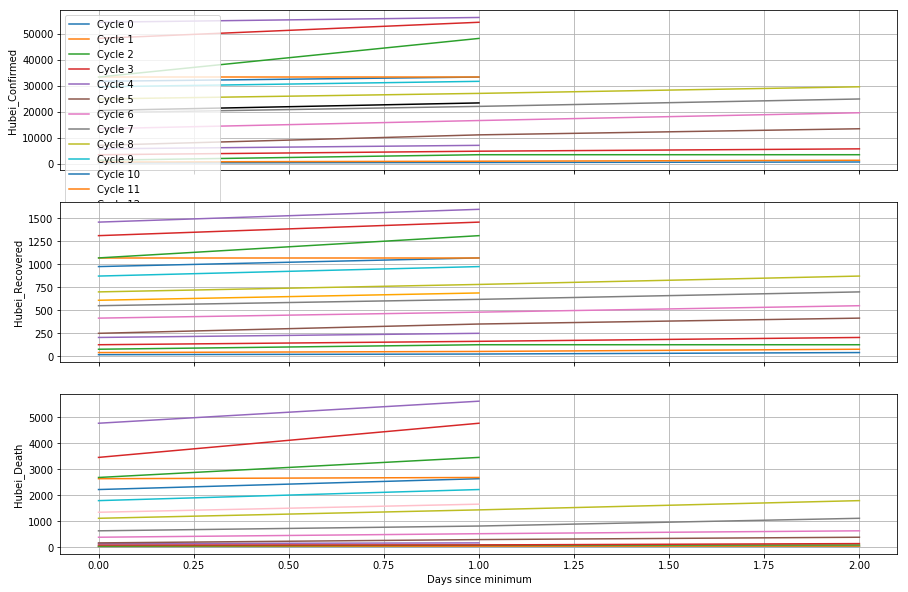

In [51]:
def plot_with_cycles(province = "Hubei"):
    fig, axes = plt.subplots(3, 1, figsize=(15,10), sharex=True)
    key0 = province + '_Confirmed'
    key1 = province + '_Recovered'
    key2 = province + '_Death'
    for i, cycle in enumerate(cycles):
        cycle[key0].plot(ax=axes[0], label=f"Cycle {i}")
        cycle[key1].plot(ax=axes[1])
        cycle[key2].plot(ax=axes[2])
    N_cycles = len(cycles)
    (sum(cycles)[key0]/N_cycles).plot(ax=axes[0], color="black", label='Mean_'+key0)
    (sum(cycles)[key1]/N_cycles).plot(ax=axes[1], color="orange", label='Mean_'+key1)
    (sum(cycles)[key2]/N_cycles).plot(ax=axes[2], color="pink", label='Mean_'+key2)
    axes[0].legend(loc="upper left")
    axes[0].set_ylabel(key0)
    axes[1].set_ylabel(key1)
    axes[2].set_ylabel(key2)
    axes[2].set_xlabel("Days since minimum")
    for ax in axes:
        ax.grid()

plot_with_cycles()

This helps us to see how the cycles differ from each other: for example, the most recent cycle (cycle 7 in this case, since some numbers shown as NaN for cycle 8) is consistently higher than the mean, both in the Recovered and Confirmed cases. 

By constructing the mean of the cycles, we are actually reinforcing the similar pattern over each cycle and reducing the effect of the random noise. This is the basis of a technique called `superposed epoch analysis`, which is useful for identifying periodicities and similarities between noisy time series.

## 3. Parse the time-series data (in the U. S., Australia & Canada)

Of the four administrative units splitting of the original data, now we have done with the first situation:
  1. for Mainland China, number of cases are reported per province; 
  2. for most of the regions and countries outside of Mainland China, number of cases are summarized per region/country (e.g. we are seeing Belgium as a country/region being reported here); 
  3. for cities/counties with significant number of cases outside of Mainland China, number of cases are reported per single city or county (e.g. Madison, WI in the U.S. is listed individually here); 
  4. the last record in the DataFrame lists Cruise Ship since the Diamond Princess cruise ship itself contains a considerable amount of confirmed cases.

With the `plot_per_function` method defined previously, we can also look into the statistics from outside of Mainland China. Let's first explore the 3rd situation here.

### Confirmed and Recovered cases in the U.S.

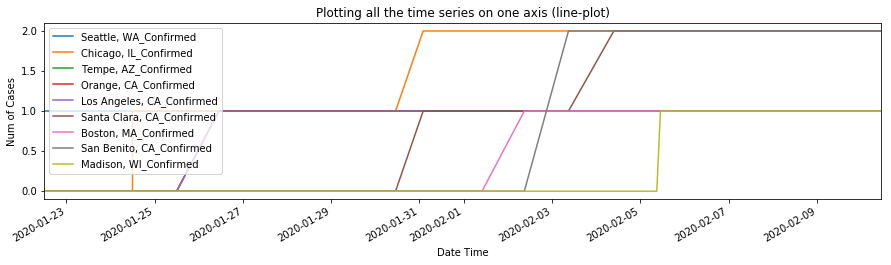

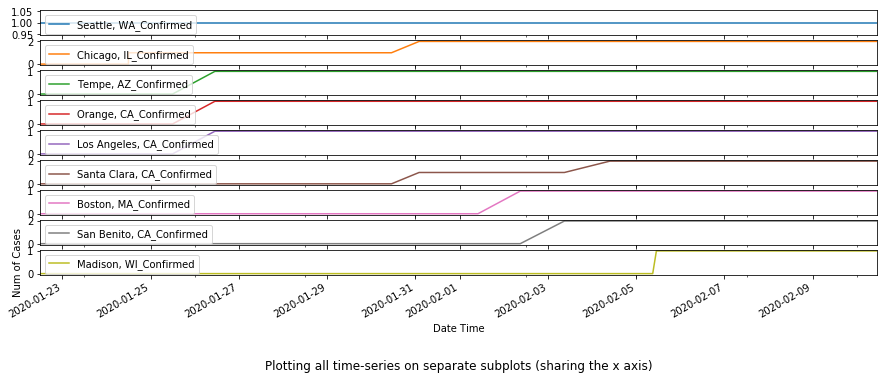

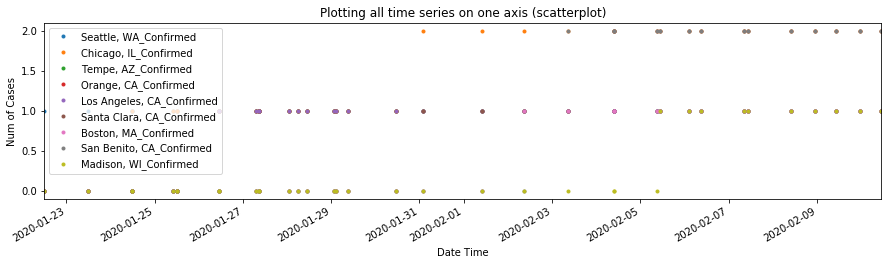

In [100]:
df_usa_confirmed = plot_per_country(df_confirmed, "US")

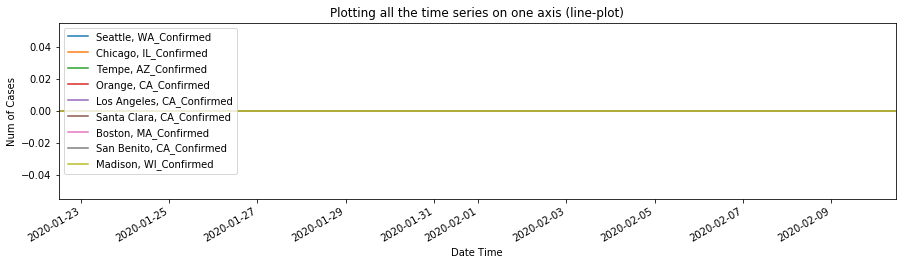

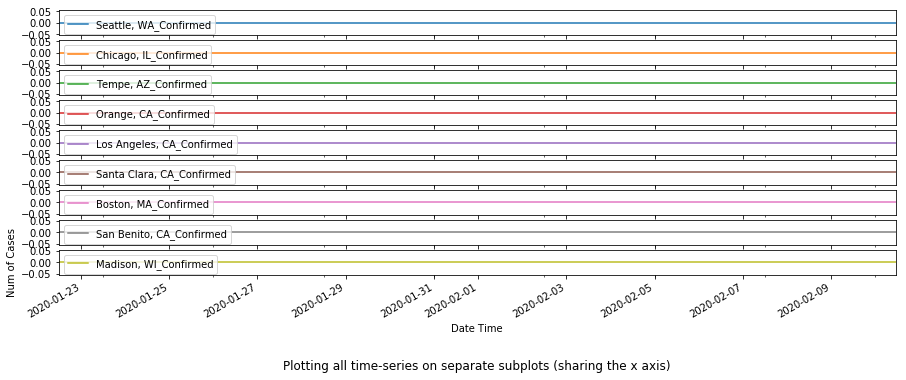

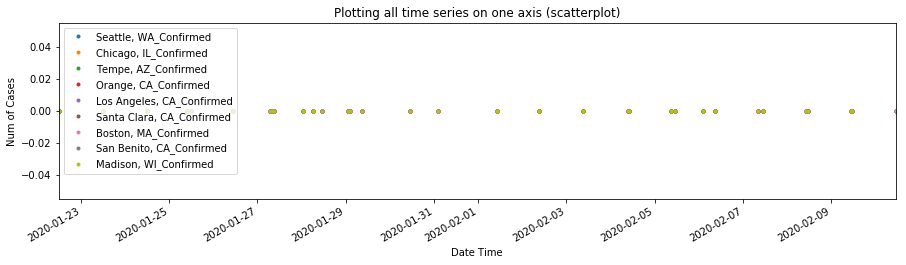

In [101]:
df_usa_recovered = plot_per_country(df_recovered, "US")

### Confirmed Case in Australia & Canada

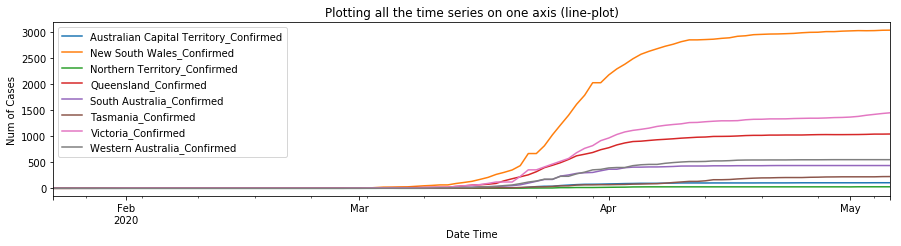

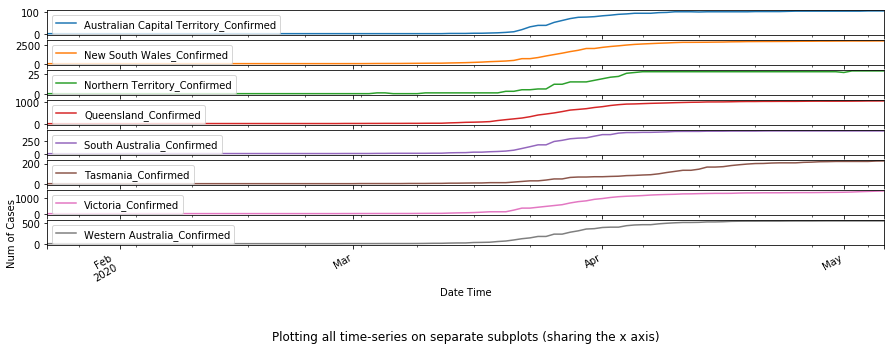

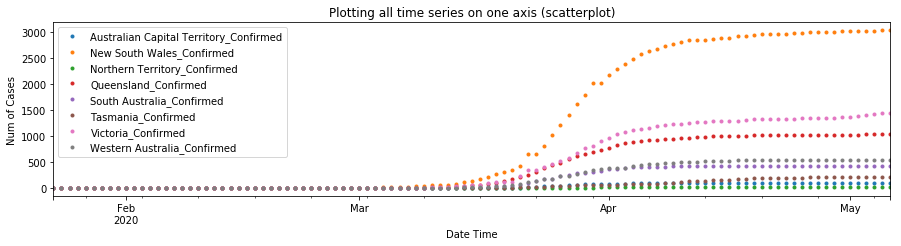

In [54]:
df_au_confirmed = plot_per_country(df_confirmed, "Australia")

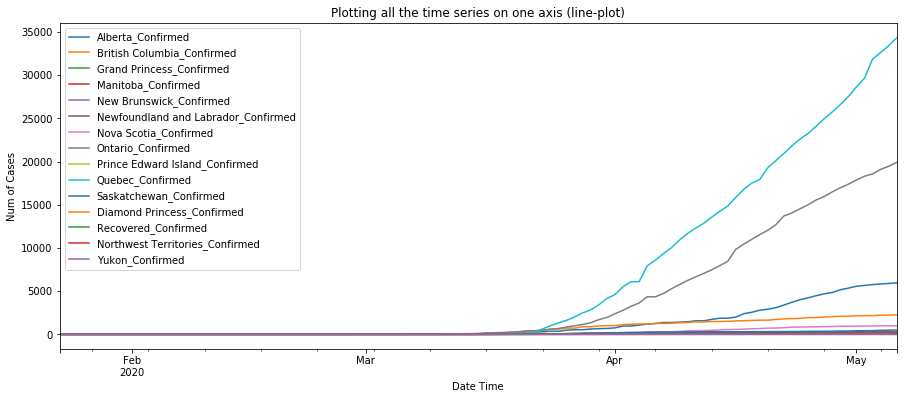

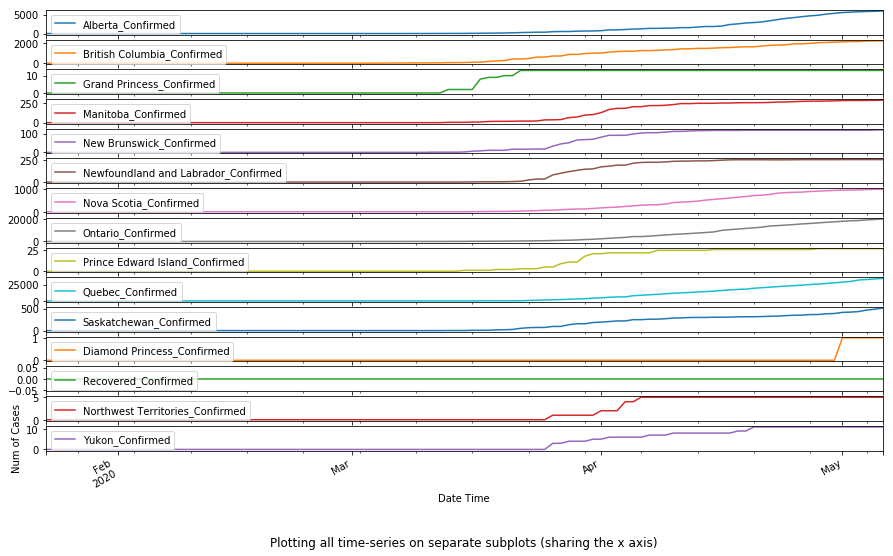

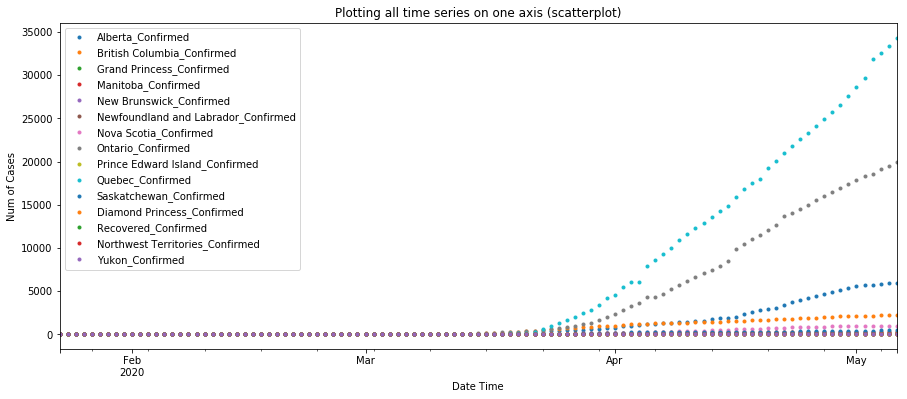

In [53]:
df_ca_confirmed = plot_per_country(df_confirmed, "Canada")

As shown in the plots above, in the U. S., Chicago, IL and San Benito, CA are the top 2 cities with most confirmed cases (2 cases), Queensland tops in Australia with 2 cases, and Toronto tops in Canada with 3 cases confirmed.

### Confirmed Cases on the Cruise Ship

Also to note that in the 4th situation where the Cruise Ship itself is listed as `Others` for the `Country\Region` column, we can also plot the time-series of its data similar to the 3rd situation (where we map all cities with confirmed cases inside a country/region outside of Mainland China).

In [58]:
df_confirmed[df_confirmed['Country/Region'].str.contains('Princess')]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20
88,NaN,Diamond Princess,0.0,0.0,0,0,0,0,0,0,...,712,712,712,712,712,712,712,712,712,712


In [60]:
df_confirmed[df_confirmed['Province/State']=='Diamond Princess']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20
231,Diamond Princess,Canada,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,1,1


In [ ]:
df_ship_confirmed = plot_per_country(df_confirmed, "Diamond Princess")

## 4. Time Series Lag Scatter Plots

Time series modeling assumes a relationship between an observation and the previous observation. Previous observations in a time series are called `lags`, with the observation at the previous time step called `lag1`, the observation at two time steps ago `lag2`, and so on.

A useful type of plot to explore the relationship between each observation and a lag of that observation is the scatter plot. `Pandas` has a built-in function for exactly this called `the lag plot`. It plots the observation at time `t` on the x-axis and the lag1 observation `(t-1)` on the y-axis.
  - If the points cluster along a diagonal line from the bottom-left to the top-right of the plot, it suggests a positive correlation relationship.
  - If the points cluster along a diagonal line from the top-left to the bottom-right, it suggests a negative correlation relationship.
  - Either relationship is good as they can be modeled.

More points tighter in to the diagonal line suggests a stronger relationship and more spread from the line suggests a weaker relationship. A ball in the middle or a spread across the plot suggests a weak or no relationship.

Below is an example of a lag plot for the `Hubei_Confirmed` Series.

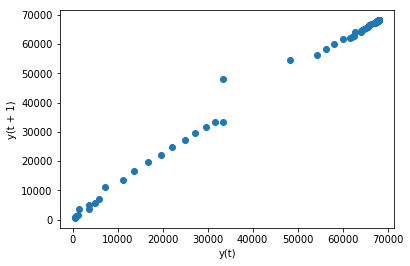

In [63]:
from matplotlib import pyplot
from pandas.plotting import lag_plot
lag_plot(df1['Hubei_Confirmed'])
pyplot.show()

We can repeat this process for an observation and any lag values. Perhaps with the observation at the same time last week, last month, or last year, or any other domain-specific knowledge we may wish to explore.

For example, we can create a scatter plot for the observation with each value in the previous seven days. Below is an example of this for the `Hubei_Confirmed` Series.

First, a new DataFrame is created with the lag values as new columns. The columns are named appropriately. Then a new subplot is created that plots each observation with a different lag value.

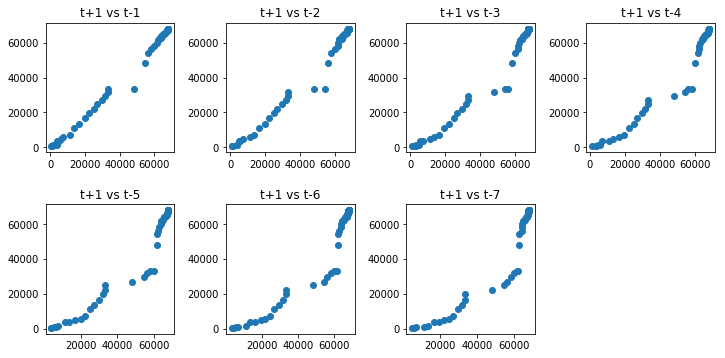

In [64]:
values = df1['Hubei_Confirmed']
lags = 7
columns = [values]
for i in range(1,(lags + 1)):
    columns.append(values.shift(i))
dataframe = pd.concat(columns, axis=1)
columns = ['t+1']
for i in range(1,(lags + 1)):
    columns.append('t-' + str(i))
dataframe.columns = columns
pyplot.figure(1, figsize=(12,9))
for i in range(1,(lags + 1)):
    ax = pyplot.subplot(240 + i)
    pyplot.subplots_adjust(bottom=0.4, wspace = 0.4, hspace = 0.4)
    ax.set_title('t+1 vs t-' + str(i))
    pyplot.scatter(x=dataframe['t+1'].values, y=dataframe['t-'+str(i)].values)
pyplot.show()

Running the code block above suggests the strongest relationship between an observation with its lag1 value, but generally a good negative correlation with each value in the last week.

## 5. Time Series Autocorrelation Plots

We can quantify the strength and type of relationship between observations and their lags. In statistics, this is called correlation, and when calculated against lag values in time series, it is called `autocorrelation` (self-correlation).

A correlation value calculated between two groups of numbers, such as observations and their lag1 values, results in a number between -1 and 1. The sign of this number indicates a negative or positive correlation respectively. A value close to zero suggests a weak correlation, whereas a value closer to -1 or 1 indicates a strong correlation.

Correlation values, called `correlation coefficients`, can be calculated for each observation and different lag values. Once calculated, a plot can be created to help better understand how this relationship changes over the lag. This type of plot is called `an autocorrelation plot` and `Pandas` provides this capability built in, called the `autocorrelation_plot()` function.

The cell below creates an autocorrelation plot for the `Hubei_Confirmed` Series:

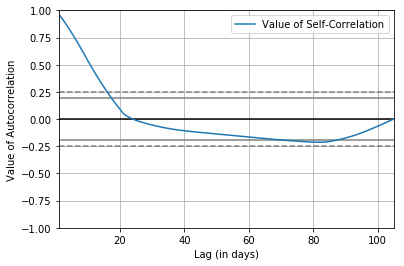

In [65]:
from pandas.plotting import autocorrelation_plot
ax = autocorrelation_plot(df1['Hubei_Confirmed'], label="Value of Self-Correlation")
ax.set_xlabel("Lag (in days)")
ax.set_ylabel("Value of Autocorrelation")
pyplot.show()

The resulting plot shows lag (in days) along the x-axis and the value of correlation on the y-axis. Dotted lines are provided that indicate any correlation values beyond those lines are `statistically significant`. We can see that for the `Hubei_Confirmed` Series, cycles of strong positive correlation before day 6. This captures the relationship of an observation with past observations, and there is no seasonal or recurrent trends.

## Conclusions

While China and beyond have struggled to cope with the rapid spread of the virus, it is important for everyone to closely monitor the situations and take precautionary measures. Serving to the purpose, this notebook has discussed how to perform data analysis and time series charting of COVID-19 across the globe at various levels, which includes all provinces in Mainland China, selected countries or regions (e.g. the United States, and Canada), and the Cruise Ship. Also, approaches to perform cross-comparisons within different categories, or provinces, are demonstrated here, to help figure out which provinces/states in Mainland China are impacted the most, or at critical phases of virus development. Then, Time-Series Lag Scatter plots and Autocorrelation Plots are drawn in the process of studying the time-lag-correlation, and the autocorrelation of the COVID-19 time-series. 

More info can be found at <a href="https://storymaps.arcgis.com/stories/4fdc0d03d3a34aa485de1fb0d2650ee0">storymaps</a>.

## References

[1] http://epirecip.es/epicookbook/chapters/kr08/2_1/python_original

[2] https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/

[3] https://github.com/mattravenhall/BasicSIRModel